<a href="https://colab.research.google.com/github/lOmarMisbahl/ImageSegmentation/blob/main/SpectralClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
$from os import listdir
from PIL import Image as PImage
from PIL import ImageColor as PColor
from random import randint
from copy import deepcopy
import matplotlib.pyplot as plt
import numpy as np
import scipy.io
from sklearn.metrics.cluster import contingency_matrix
from sklearn.cluster import KMeans as ImplementedKMeans
from sklearn.cluster import SpectralClustering as SpectralClustering
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics.pairwise import rbf_kernel as rbf
from sklearn.neighbors import NearestNeighbors as nn
from scipy.sparse.linalg import eigs as sciEigs

In [ ]:
def DataLoading(ImagesPath,GroundTruthPath,MatrixDimensions):
    GroundTruthMatrix = []
    ImagesList = listdir(ImagesPath)
    ImagesMatrix = np.arange(MatrixDimensions[0] * MatrixDimensions[1]).reshape(MatrixDimensions)
    NumOfPixels = MatrixDimensions[0] // len(ImagesList)
    Dimensions = MatrixDimensions[1]
    Count = 0
    for Image in ImagesList:
        GroundTruth = scipy.io.loadmat(GroundTruthPath+Image[:-4])
        Img = PImage.open(ImagesPath+Image)
        ImagesMatrix[NumOfPixels*Count:NumOfPixels+(NumOfPixels*Count),:] = np.array(Img).reshape(NumOfPixels,Dimensions)
        for j in range(0,GroundTruth['groundTruth'].shape[1]):
            GroundTruthMatrix.append(GroundTruth['groundTruth'][0][j][0][0][0])
        Count += 1
    return ImagesMatrix,GroundTruthMatrix

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
TrainPath = "/content/drive/MyDrive/dataResized/images/"
GroundTruthPath = "/content/drive/MyDrive/dataResized/ground_truth/train/"
NumOfPixels = 120*80
Dimensions = 3
NumOfImages=200
Train, GroundTruth = DataLoading(TrainPath,GroundTruthPath,(NumOfPixels*NumOfImages,Dimensions))

In [ ]:
def Colorize(Clusters,Image,NumOfClusters):
    ColorizedImage= np.zeros(Image.shape,dtype=np.uint8)
    Colors = []
    for i in range(NumOfClusters):
        Colors.append(np.array([randint(0, 255),randint(0, 255),randint(0, 255)]))
    for i in range(Image.shape[0]):
        ColorizedImage[i] = Colors[Clusters[i]]
    return ColorizedImage

In [ ]:
def NormalizedCut(Data, NumOfClusters, Mode, Gamma=1.0, NumOfNeighbors=1):
    if(Mode == 'rbf'):
        similarityMatrix = rbf(Data,Data,Gamma)
    elif(Mode == 'knn'):
        nearest_neigbhor = nn(n_neighbors=NumOfNeighbors)
        nearest_neigbhor.fit(Data)
        similarityMatrix = nearest_neigbhor.kneighbors_graph(Data, mode='connectivity').toarray()
        
    degreeMmatrix = np.diag(np.sum(similarityMatrix, axis=1))
    laplacianMatrix = degreeMmatrix - similarityMatrix
    nomalizedAsymmertircLaplacianMatrix = np.dot(np.linalg.pinv(degreeMmatrix),laplacianMatrix) 
    values,vectors = np.linalg.eig(nomalizedAsymmertircLaplacianMatrix)
    idx = np.real(values).argsort()[:NumOfClusters]
    vectors = np.real(vectors[:,idx])
    Normalization = np.linalg.norm(vectors, axis=1)
    NormalizedVectors = (vectors.T / Normalization).T
    Clusters = ImplementedKMeans(n_clusters=NumOfClusters,n_jobs=-1).fit_predict(NormalizedVectors)
    return Clusters

In [ ]:
ColorizedImages = []
Count = 2
#Clusters=NormalizedCut(Train[NumOfPixels*Count:NumOfPixels+(NumOfPixels*Count)],5,'knn',NumOfNeighbors=5)
Clusters=SpectralClustering(n_clusters=5,affinity='nearest_neighbors',n_neighbors=5,n_jobs=-1).fit_predict(Train[NumOfPixels*Count:NumOfPixels+(NumOfPixels*Count)])
ColorizedImages.append(Colorize(Clusters,Train[NumOfPixels*Count:NumOfPixels+(NumOfPixels*Count)],5))

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


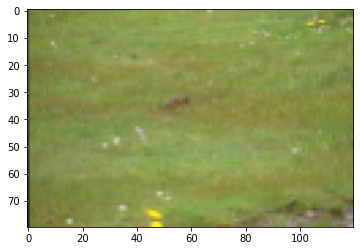

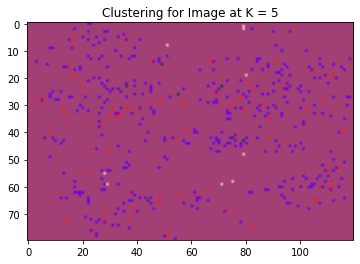

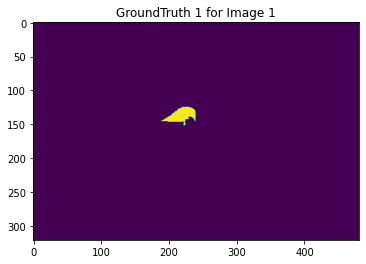

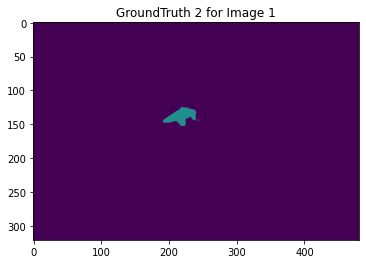

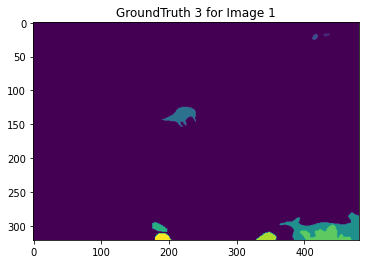

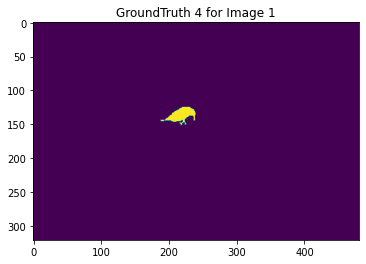

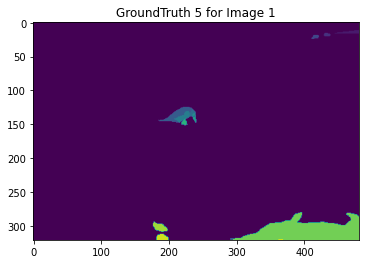

In [ ]:
plt.imshow(Train[NumOfPixels*Count:NumOfPixels+(NumOfPixels*Count)].reshape(80,120,3));
plt.figure();
plt.imshow(ColorizedImages[0].reshape(80,120,3));
plt.title("Clustering for Image at K = 5");
plt.figure();
plt.imshow(GroundTruth[11]);
plt.title("GroundTruth 1 for Image 1");
plt.figure();
plt.imshow(GroundTruth[12]);
plt.title("GroundTruth 2 for Image 1");
plt.figure();
plt.imshow(GroundTruth[13]);
plt.title("GroundTruth 3 for Image 1");
plt.figure();
plt.imshow(GroundTruth[14]);
plt.title("GroundTruth 4 for Image 1");
plt.figure();
plt.imshow(GroundTruth[15]);
plt.title("GroundTruth 5 for Image 1");